In [1]:
import os
import json

import numpy as np

import matplotlib
import matplotlib.pyplot as plt


import detectron2
import detectron2.data.transforms as T

import labelme

In [2]:
# Load image and polygon mask from all json files in the current directory
imgs = []
polygon_list = []
path = "./"
valid_filetype = [".json"]
for file in os.listdir(path):
    ext = os.path.splitext(file)[1] # find he extension of the file
    if ext.lower() not in valid_filetype:
        continue
    data = json.load(open(file))
    # Append images to a list of nd arrays
    img_data = data.get("imageData")
    img = labelme.utils.img_b64_to_arr(img_data) # load image to np array
    imgs.append(img)
    # Append mask to a list of polygons
    poly = data.get("shapes")
    poly_for_single_img = []
    for polyitem in poly:
        polygon = np.array(polyitem.get("points"))
        polygon = np.reshape(polygon,(len(polygon),2))
        poly_for_single_img.append(polygon)
    polygon_list.append(poly_for_single_img)

#print(polygon_list, imgs)

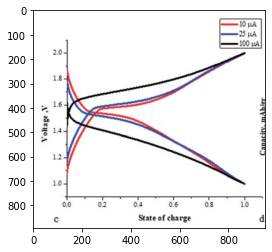

In [3]:
plt.imshow(imgs[0])
plt.show()

In [13]:
np.shape(imgs[0])[0]

892

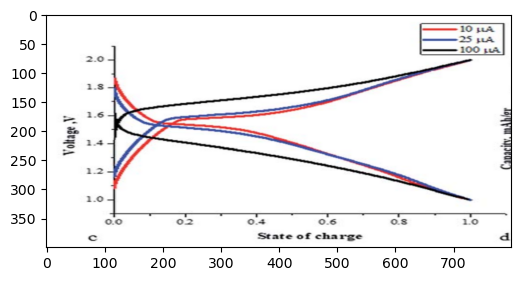

In [19]:
matplotlib.rcParams['figure.dpi'] = 100

shortest_edge_len = 300
max_len = 800
new_imgs = []
new_masks = []
# Resize image and mask to have uniform shrtest lengths
shortest_edge = T.ResizeShortestEdge(shortest_edge_len, max_len)

for i,img in enumerate(imgs):
    # Scale image to desired width and height
    scale = T.ScaleTransform(np.shape(img)[0],np.shape(img)[1],400, 800)
    shortest_edge_transform = shortest_edge.get_transform(img)
    #type(shortest_edge_transform)
    #new_imgs.append(shortest_edge_transform.apply_image(img))
    #new_masks.append(shortest_edge_transform.apply_polygons(polygon_list[i]))
    new_imgs.append(scale.apply_image(img, "bilinear"))
    new_masks.append(scale.apply_polygons(polygon_list[i]))
 

plt.imshow(new_imgs[0])
plt.show()

https://imgaug.readthedocs.io/en/latest/source/api_augmenters_size.html?highlight=padto#imgaug.augmenters.size.CenterPadToFixedSize

In [5]:
# Crop and Pad image and mask
# Use Centerpadtofixedsize() to pad image to fixed size


In [6]:
# Get padded pixels imgaug and move polygon masks to corresponding positions

In [7]:
# Output json file with updated images and masks